# КОММЕНТАРИЙ РЕВЬЮВЕРА 2:

Приветствую тебя еще раз!) Спасибо за то, что доработал проект!

Мои комментарии будут также обозначены разными цветами, но с пометкой 2:
    
    «КОММЕНТАРИЙ РЕВЬЮВЕРА 2: ... »

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
Алексей, я ответил на твои вопросы, желаю успехов в дальнейшем обучении! Буду рад видеть тебя вновь)    


</div>

# КОММЕНТАРИЙ РЕВЬЮВЕРА
Привет, Алексей 👋!)

Меня зовут Обидин Андрей, я осуществлял проверку проекта. Может перейдем сразу на <b>ты</b>? Если это неприемлемо, то обязательно дай знать)

Благодарю тебя за то, что вовремя всё сдал и хорошо поработал!) Мне понравился твой проект, ты большой молодец! Критичных замечаний нет, разве что дополнения и советы) Возможно у тебя есть вопросы?🔍

Далее по ходу работы ты сможешь встретить мои комментарии, они будут отмечены разными цветами:

<div class="alert alert-block alert-success">
Похвала и возможности развития
</div>
<div class="alert alert-block alert-warning">
Некритичные замечания, но стоит обратить внимание
</div>
<div class="alert alert-block alert-danger">
Грубая ошибка, необходимо исправить
</div>


Заранее прошу не удалять мои комментарии, это важно. Если у тебя возникнут вопросы, обозначь их, я с радостью тебе помогу!)

Как вариант, можешь обозначить их так:
<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
</div>

<a id='top'></a>
<img align="center" src="https://ieltsunlocked.files.wordpress.com/2019/03/choices-1.gif" width="200" />
<p style="text-align: center;">
    <font size='5' type='bold'>
        <b>Рекомендация тарифов</b>
    </font>
</p>

### Содержание

<a href='#section_0'>Задачи проекта</a>

<a href='#section_1'>1. Откройте и изучите файл</a>

<a href='#section_2'>2. Разбейте данные на выборки</a>
    
<a href='#section_3'>3. Исследуйте модели</a>

* <a href='#section_3_1'>Дерево решений</a>
* <a href='#section_3_2'>Случайный лес</a>
* <a href='#section_3_3'>Логистическая регрессия</a>

<a href='#section_4'>4. Проверьте модель на тестовой выборке</a>

<a href='#section_5'>5. (бонус) Проверьте модели на адекватность</a>
    
<a href='#section_end'>Чек-лист готовности проекта</a>

<a id='section_0'></a>
### Задачи проекта
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Хорошее интро)    


</div>

<a id='section_1'></a>
### 1. Откройте и изучите файл

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [21]:
df.head(3)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0


Датасет состоит из 3214 объектов и 5 признаков. Целевой признак для нашей задачи – `is_ultra`. Модель должна предсказывать значение **1** если клиенту нужно предложить тариф "Ультра" или **0** если тариф "Смарт". Наш целевой признак является категориальным, а значит мы будем решать задачу классификации. 

Таблица *df* (информация о поведении пользователей) содержит следующие данные:
- **calls** — количество звонков
- **minutes** — суммарная длительность звонков в минутах
- **messages** — количество sms-сообщений
- **mb_used** — израсходованный интернет-трафик в Мб
- **is_ultra** — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.

Всего в таблице 5 столбцов, типы данных: 
- **целые числа** у 1 столбца
- **вещественные числа** (с "плавающей" точкой) у 4

Пропуски не представлены, так как предобработка данных уже проведена.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Датафрейм осмотрел, молодец)

</div>

<a id='section_2'></a>
### 2. Разбейте данные на выборки
Разделим исходные данные на обучающую, валидационную и тестовую выборки. Размеры тестового и валидационного наборов сделаем равными.

In [22]:
# Отведем 60% под обучающую выборку
df_train, df_valid = train_test_split(df, test_size=0.4, random_state=54321)

# Оставшиеся 40% поделим на валидационную и на тестовую
df_valid, df_test = train_test_split(df_valid, test_size=0.5, random_state=54321)

Получили подготовленный датасет с 60% обучающей выборки, 20% валидационной и 20% тестовой.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Да, так как нам не дана тестовая выборка, то ее необходимо сформировать, именно поэтому датафрейм поделится в соотношении 60\20\20

</div>

<a id='section_3'></a>
### 3. Исследуйте модели
Исследуем качество разных моделей, меняя гиперпараметры. Для задачи классификации рассмотрим следующие:
* Дерево решений
* Случайный лес
* Логистическая регрессия

In [23]:
features_train = df_train.drop(['is_ultra'], axis=1) # фичи обучающей выборки
target_train = df_train['is_ultra'] # целевые признаки обучающей выборки

features_valid = df_valid.drop(['is_ultra'], axis=1) # фичи валидационной выборки
target_valid = df_valid['is_ultra'] # целевые признаки валидационной выборки

<a id='section_3_1'></a>
#### Дерево решений

Исследуем качество модели решающего дерева с различной глубиной

In [24]:
for depth in range(2, 17, 2):
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features_train, target_train) # обучим модель
    predictions = model.predict(features_valid) # получим предсказания модели
    result = accuracy_score(target_valid, predictions) # посчитаем качество модели
    print('Качество модели с глубиной дерева = {}:'.format(depth), result)

Качество модели с глубиной дерева = 2: 0.7418351477449455
Качество модели с глубиной дерева = 4: 0.744945567651633
Качество модели с глубиной дерева = 6: 0.7542768273716952
Качество модели с глубиной дерева = 8: 0.7511664074650077
Качество модели с глубиной дерева = 10: 0.7822706065318819
Качество модели с глубиной дерева = 12: 0.7480559875583204
Качество модели с глубиной дерева = 14: 0.7356143079315708
Качество модели с глубиной дерева = 16: 0.7293934681181959


Наилучшим качеством обладает модель с глубиной дерева = 10

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Молодец! Однако, как вариант можно было сделать автоматический выбор оптимальной модели:    


</div>

In [25]:
# КОД РЕВЬЮВЕРА

best_tree = None
best_depth = 0
best_score = 0

for depth in range(2, 17, 2):
    
    model = DecisionTreeClassifier(random_state=54321, max_depth=depth)
    model.fit(features_train, target_train)
    
    predictions = model.predict(features_valid) 
    result = accuracy_score(target_valid, predictions)
    
    if result > best_score: 
        
        best_tree = model
        best_score = result
        best_depth = depth

print('Качество лучшего дерева:', best_score)
print(best_tree)

    
    

Качество лучшего дерева: 0.7822706065318819
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=54321, splitter='best')


<a id='section_3_2'></a>
#### Случайный лес

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
То что ты ранее на дереве получил оптимальную глубину 10 еще не означает, что она подойдет и для леса, поэтому лучше делать двойной перебор гиперпараметров. Помимо этого было бы хорошо оценивать качество на тренировочной выборке, чтобы мы понимали переобучение\недообучение.


</div>

In [26]:
for est in range(10, 101, 10):
    model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=10)
    model.fit(features_train, target_train) # обучим модель
    predictions = model.predict(features_valid) # получим предсказания модели
    result = accuracy_score(target_valid, predictions) # посчитаем качество модели
    print('Качество модели с количеством деревьев = {}:'.format(est), result)

Качество модели с количеством деревьев = 10: 0.80248833592535
Качество модели с количеством деревьев = 20: 0.7869362363919129
Качество модели с количеством деревьев = 30: 0.7900466562986003
Качество модели с количеством деревьев = 40: 0.7916018662519441
Качество модели с количеством деревьев = 50: 0.7916018662519441
Качество модели с количеством деревьев = 60: 0.7947122861586314
Качество модели с количеством деревьев = 70: 0.7947122861586314
Качество модели с количеством деревьев = 80: 0.7962674961119751
Качество модели с количеством деревьев = 90: 0.7978227060653188
Качество модели с количеством деревьев = 100: 0.7978227060653188


Наилучшим качеством обладает модель с количеством деревьев = 10. При этом стоит отметить, что качество модели случайного леса (0.80) достаточно близко к значению качества модели решающего дерева (0.78).

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
При этом работать лес будет дольше дерева

Давай глянем двойной цикл перебора гиперпараметров:


</div>

In [27]:
# КОД РЕВЬЮВЕРА

best_forest = None
best_score = 0

for est in range(5, 100, 5):
    for depth in range(2, 20, 2):
        model = RandomForestClassifier(random_state=54321, n_estimators=est, max_depth=depth)

        model.fit(features_train, target_train)
        predictions = model.predict(features_valid) 
        result = accuracy_score(target_valid, predictions) 

        if result > best_score:

            best_forest = model
            best_score = result
        
print('Качество лучшего леса:', best_score)
print(best_forest)

# АГА) Кол-во деревьев и глубина действительно равна 10, но все же лучше делать двойной перебор гиперпараметров через цикл

Качество лучшего леса: 0.80248833592535
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=54321,
                       verbose=0, warm_start=False)


<a href='#top'>Back to top</a>

<a id='section_3_3'></a>
#### Логистическая регрессия

In [28]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag'] # обозначим набор алгоритмов, использующийся для оптимизации (solvers)

for solver in solvers:
    model = LogisticRegression(random_state=54321, solver=solver)
    model.fit(features_train, target_train) # обучим модель
    predictions = model.predict(features_valid) # получим предсказания модели
    result = accuracy_score(target_valid, predictions) # посчитаем качество модели
    print('Качество модели с параметром = {}:'.format(solver), result)

Качество модели с параметром = newton-cg: 0.7076205287713841
Качество модели с параметром = lbfgs: 0.6749611197511665
Качество модели с параметром = liblinear: 0.6780715396578538
Качество модели с параметром = sag: 0.6516329704510109


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

Наилучшим качеством обладает модель с параметром алгоритма для оптимизации `newton-cg` - 0.71. Тем не менее, качество модели логистической регрессии ниже качества моделей решающего дерева и случайного леса.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Регрессия действительно работает хуже всех

</div>

#### Вывод
Исследовав качество разных моделей со сменой гиперпараметров, выявили:
* Качество модели решающего дерева (с оптимальным параметром по глубине (10)) - 0.78
* Качество модели случайного леса (с оптимальным параметром по количеству деревьев (10)) - 0.80
* Качество модели логистической регрессии (с оптимальным алгоритмом для оптимизации `newton-cg` - 0.71

Модель случайного леса - оптимальна. Проверим ее качество на тестовой выборке.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Молодец, только ознакомься с моими рекомендациями!)    


</div>

<a id='section_4'></a>
### 4. Проверьте модель на тестовой выборке
Проверим качество модели на тестовой выборке.

In [29]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

model = RandomForestClassifier(random_state=54321, n_estimators=10, max_depth=10)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
result = accuracy_score(target_test, predictions)
print('Качество модели случайного леса:', result)

Качество модели случайного леса: 0.8242612752721618


На тестовой выборке получили качество модели даже выше, чем на обучающей - 0.82. Значит модель работает.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Отлично, мы перешли рубеж в 0.75 и лес работает довольно таки хорошо!    


</div>

In [30]:
# КОД РЕВЬЮВЕРА

#  а вот интересно, дерево сильно ли хуже?

tree  = DecisionTreeClassifier(random_state = 42, max_depth = 10)
tree.fit(features_train, target_train)
predictions = tree.predict(features_test)
result = accuracy_score(target_test, predictions)
print('Качество модели случайного леса:', result)

# качество чуууть похуже, однако дерево все же работает побыстрее леса

Качество модели случайного леса: 0.8055987558320373


<a id='section_5'></a>
### 5. (бонус) Проверьте модели на адекватность

Качество модели случайного леса (с оптимальным параметром по количеству деревьев (10)) - 0.80. На тестовой выборке получили качество модели - 0.82. Как видим значения очень близки к друг другу. Однако выбор методики проверки модели на адекватность - задача не тривиальная.

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
  

Хочу рассказать тебе о такой метрике как AUC и ROC кривой, с помощью них можно интересным образом понять насколько наша модель работает лучше, чем простое угадывание. Вы изучите ее чуть более подробно в последующих курсах, но как вариант можешь ознакомиться далее. Там ты увидишь прямую линию, которая символизирует простое угадывание 50\50, и линию нашей модели. Соответственно, чем дальшей график модели от прямой линии, тем лучше и чем больше AUC (area under curve), тем также лучше.

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>


Круто! Спасибо. Пока сложно дял понимания, но для первого знакомства вполне достаточно.

Дополнительно почитал [здесь](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Молодец, похвально! Вам расскажут про новые метрики буквально в следующем курсе, там будут рассмотрены метрики регрессии \ классификации.

Кстати, в библиотеке Plotly есть блок визуализаций для ML: https://plotly.com/python/ai-ml/
        
Там ты сможешь найти ROC-кривую, да и в принципе много всего полезного)
    
Кстати, есть еще классная специализация Яндекса и МФТИ про МЛ, где разбирается прям математика, которая стоит за моделями, но при этом есть практика на Python: https://ru.coursera.org/specializations/machine-learning-data-analysis
    
Первые два курса в специализации как раз помогут вспомнить необходимый матан, а также расскажут об Обучении с учителем. Начиная с третьего курса уже идет Обучение без учителя.

</div>

0.7982165805872796


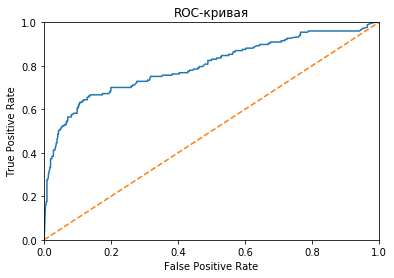

In [31]:
# КОД РЕВЬЮВЕРА

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

print(roc_auc_score(target_test, probabilities_one_test))

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

# видим, что модель работает гораздо лучше, чем случайное угадывание

# не переживай, если будет что-то непонятно, просто я решил чууть приоткрыть тебе завесу тайн, следующий курс тебе понравится еще больше!))

In [32]:
# КОД РЕВЬЮВЕРА

# помимо этого можно просто посмотреть на константу
df['is_ultra'].value_counts() / df.shape[0]

# константа дает 69, наша модель леса работает гораздо лучше

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>


Здесь не совсем понятно. По факту же это значения соотношения тарифов Смарт и Ультра во всем датасете. Как мы можем, ориентируясь на эти значения, говорить о качестве модели?

</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
А ты вспомни, что означает accuracy: кол-во правильных ответов \ на общее число вопросов. Т.е. если у нас есть модель, которая бездумно будет говорить на все наши объекты, что это класс 0, тогда у нас будет кол-во истинно нулевых объектов деленное на кол-во всех объектов:

</div>

In [10]:
# КОД РЕВЬЮВЕРА

# кол-во объектов с нулем



print(df.query('is_ultra == 0').shape[0])
print(df.shape[0])
print()
print(df.is_ultra.value_counts())
# т.е. у нас 2229 с нулем из 3214 объектов в принципе, представим, что у нас есть модель, которая прогнозирует всем ноль, без исключения

# вспомни формулу доли правильных ответов:

2229
3214

0    2229
1     985
Name: is_ultra, dtype: int64


<img align="center" src="https://pictures.s3.yandex.net/resources/accuracy_1573566344.jpg" width="800" />

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
Т.е. если у нас модель, которая говорит всем что они нули, то она угадает все нулевые объекты, а кол-во ошибок будет = кол-во объектов с классом 1, тогда:    


</div>

In [11]:
# доля правильных ответов константной модели, которая ничего не учила, а просто говорит что все нули

(3214 - 985) / 3214

# ТАДАМ

# очень надеюсь, что мне удалось объяснить понятно

0.693528313627878

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75

**Вопросы для самопроверки:**
- [x] Как вы изучаете данные после загрузки?
- [x] Корректно ли разделяете данные на выборки?
- [x] Как выбираете размеры выборок?
- [x] Правильно ли вы оцениваете качество моделей в исследовании?
- [x] Какие модели и гиперпараметры вы используете?
- [x] Какие выводы об исследовании делаете?
- [x] Правильно ли тестируете модели?
- [x] Насколько высокое значение accuracy получаете?
- [x] Соблюдаете структуру проекта и поддерживаете аккуратность кода?

<a href='#top'>Back to top</a>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Алексей, мне понравился твой проект, молодец!

</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Андрей, спасибо за комментарии! Я все прочитал, и обязательно буду использовать твои ценные советы в работе.
</div>

<div class="alert alert-block alert-success">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА 2:</b> 
    
    
Пожалуйста!) 

</div>